# Credit Card Fraud Detection using Anomaly Detection

## Problem Statement
Predict whether a credit card transaction is fraudulent or not based on its details. Extract the patterns that hint towards fraud by modeling the past transactions such that all frauds are detected and false positives are minimised.

### 1. Importing Libraries

In [61]:
#Importing necessary libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

#Importing machine learning algo libraries
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

#Importing evaluation focussed libraries
from sklearn.metrics import classification_report, accuracy_score

#Other useful libraries
!pip install missingno   
import missingno as missviz   #Custom library for missing value inspections
from sklearn.manifold import TSNE   #For visualising high dimensional data

### 2. Getting Data
Note: You could download the required data from this link - https://www.kaggle.com/mlg-ulb/creditcardfraud

In [2]:
#Load data
!ls
df=pd.read_csv('creditcard.csv')

Credit Card Fraud Detection using Anomaly Detection .ipynb
creditcard.csv
creditcard.csv.zip


### 3. Exploratory Data Analysis

**3.1 General inspection of data**

In [3]:
#Quick glance
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Quick columns glance
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
#Quick info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
#Unique values - to get a hint of which vars could be categorical, and also if vars share something
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [7]:
#Checking the count distribution for 'class' variable -> Looks like a categorical variable
df['Class'].value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

*Converting type of 'class' variable from numeric to categorical*

In [8]:
#Converting the 'class' variable from numeric to categorical
df['Class']=df['Class'].astype('category')
df['Class'].dtype

CategoricalDtype(categories=[0, 1], ordered=False)

In [9]:
#Quick description
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Time,284807.0,NaN,NaN,NaN,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,NaN,NaN,NaN,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,NaN,NaN,NaN,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,NaN,NaN,NaN,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,NaN,NaN,NaN,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,NaN,NaN,NaN,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,NaN,NaN,NaN,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,NaN,NaN,NaN,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,NaN,NaN,NaN,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,NaN,NaN,NaN,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


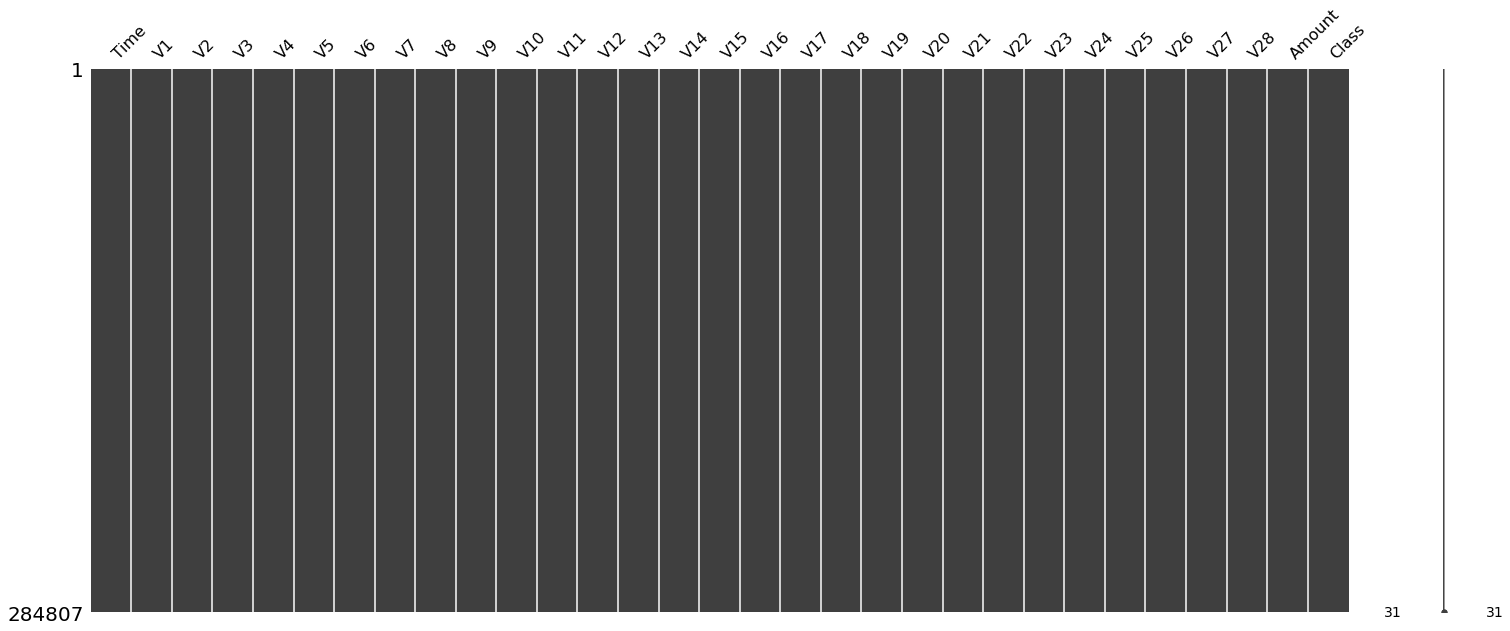

In [10]:
#Spotting missing data via visualisation
missviz.matrix(df)

**3.2 Univariate - Continous data**
- Histogram
- Boxplot

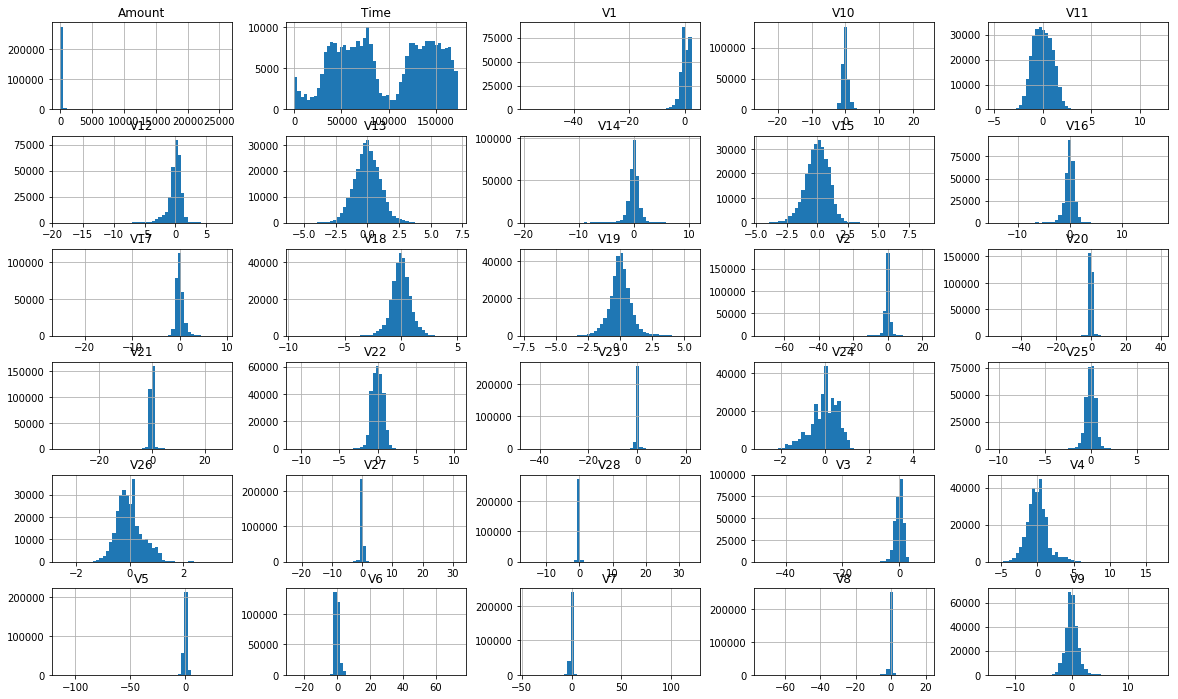

In [11]:
#HIST: Checking data distribution
df.hist(bins=50, figsize=(20,12))
plt.show()

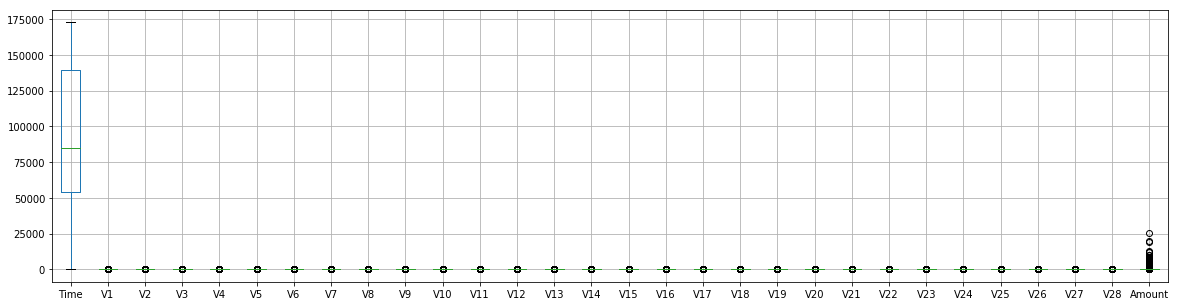

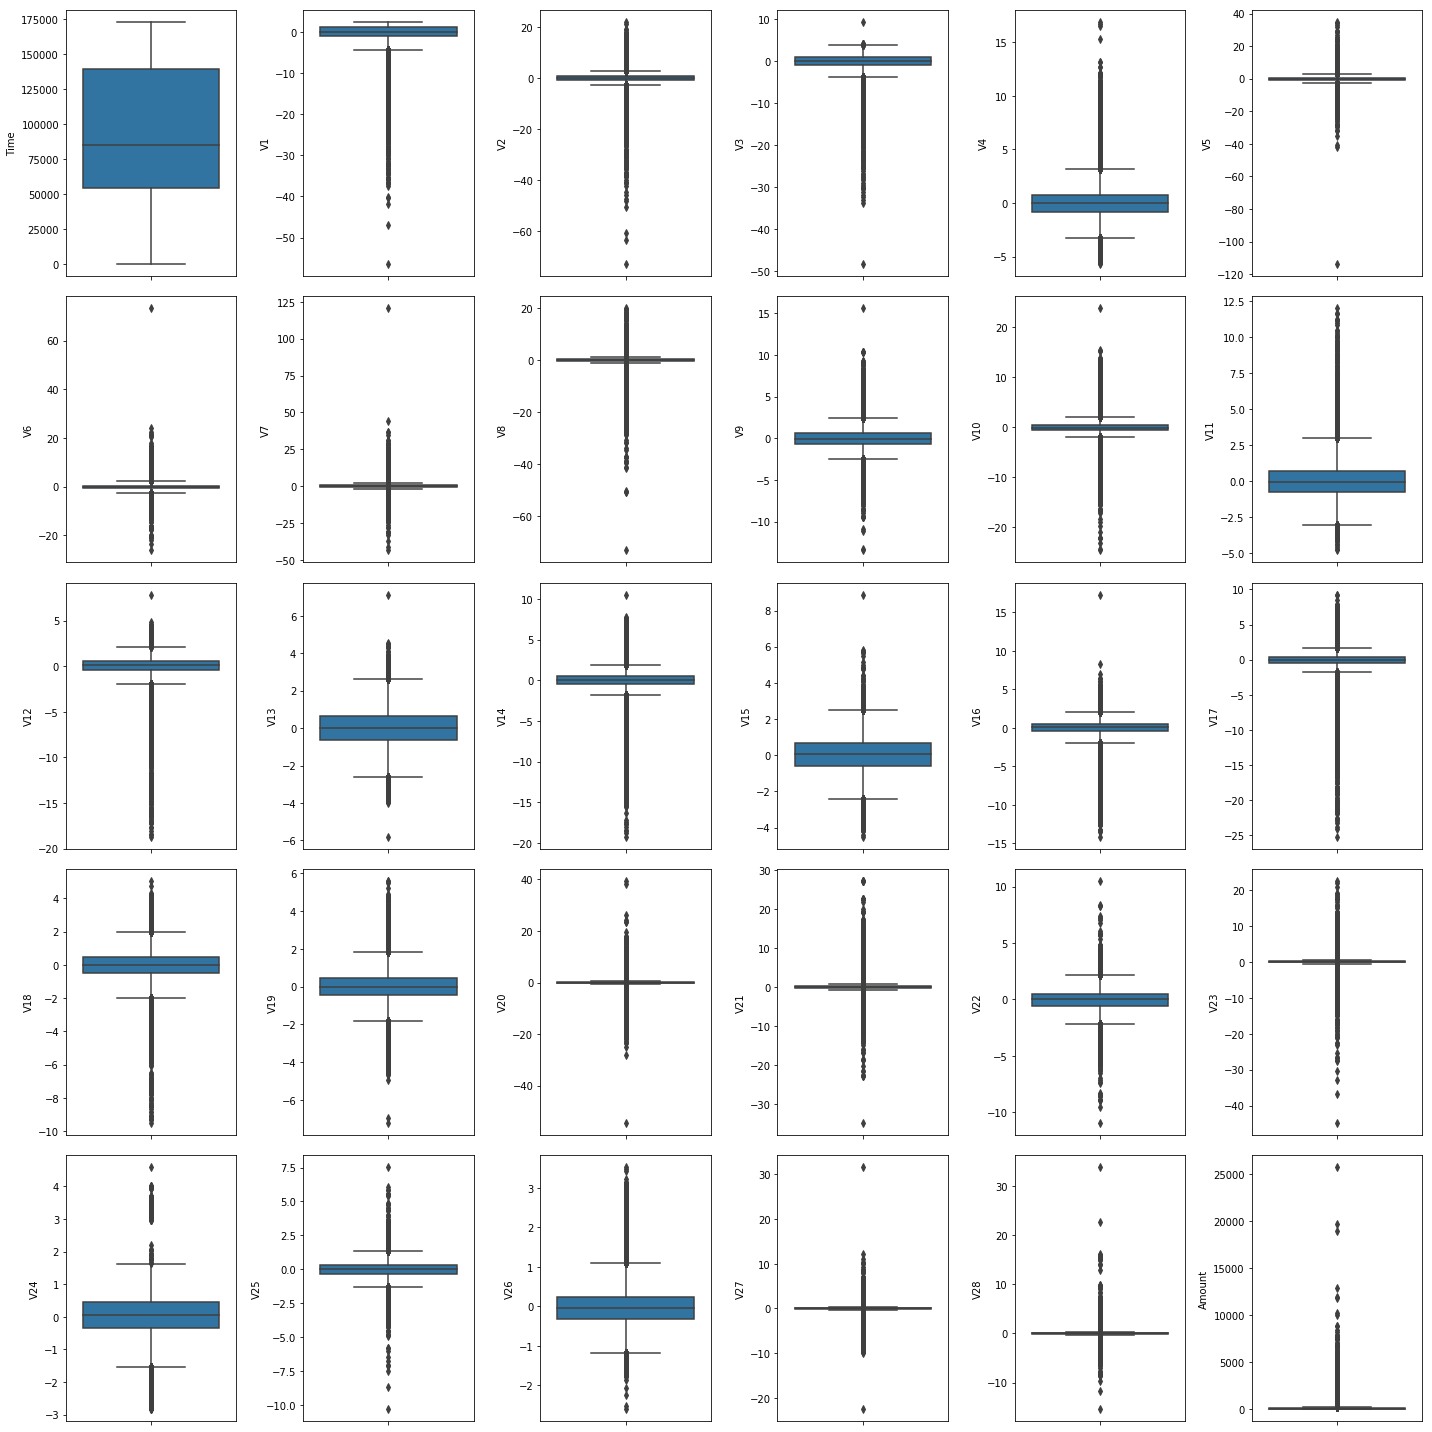

In [12]:
#BOX: Checking IQR and potential outliers 
df.boxplot(figsize=(20,5))   #all together (could do better than this as scales of vars could differ)

fig, axs = plt.subplots(5,6, figsize=(20,20))
axs = axs.flatten() #flatten() converts the 2d array to 1d

for i, col in enumerate(df.select_dtypes(exclude=['category'])):
    sns.boxplot(y=col,data=df, ax=axs[i])
    plt.tight_layout()

*Rescaling 'Time' and 'Amount'* 

In [13]:
#Rescaling Amount and Time as well as most vars are scaled (V1 to V28) except them
from sklearn.preprocessing import StandardScaler, RobustScaler   #RobustScaler robust to outliers

df['scaled_time']=RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))
df['scaled_amount']=RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)
df[['scaled_time', 'scaled_amount']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
scaled_time,284807.0,0.118914,0.557903,-0.994983,-0.358210,0.0,0.641790,1.035022
scaled_amount,284807.0,0.927124,3.495006,-0.307413,-0.229162,0.0,0.770838,358.683155


**3.3 Univariate - Categorical data**

- Countplot - Looks like a highly unbalanced "Class" varibale

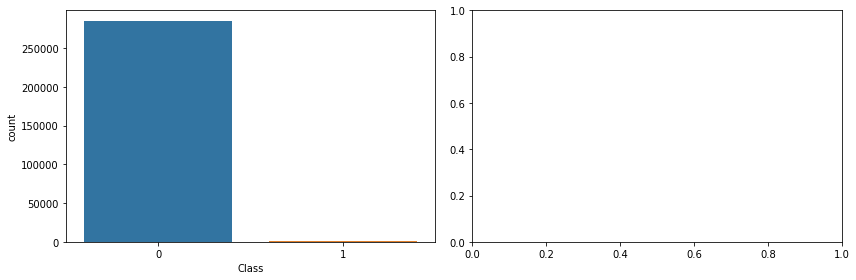

In [14]:
#COUNTPLOT: Checking value_counts -> Highly skewed data
fig, axs = plt.subplots(1,2, figsize=(12,4))
axs = axs.flatten()

for i, cols in enumerate(df.select_dtypes(include=['category']).columns):
    #print(df[cols].value_counts()/len(df)*100)
    sns.countplot(x='Class', data=df, ax=axs[i])
    plt.tight_layout()

**3.4 Bivariate - Continuous vs categorical (Side-by-side Boxplot)**
- We have just one categorical var ('class') which happens to be our dependent variable
- Predictors V1:V4, V7:V12, V14, V16, V17, V21 surely seem to affect the likeliness of a transaction to be a fraud
- Other predictors (except V13, V15, V22, V24, V25, V26) likely seem to affect this likeliness for fraud

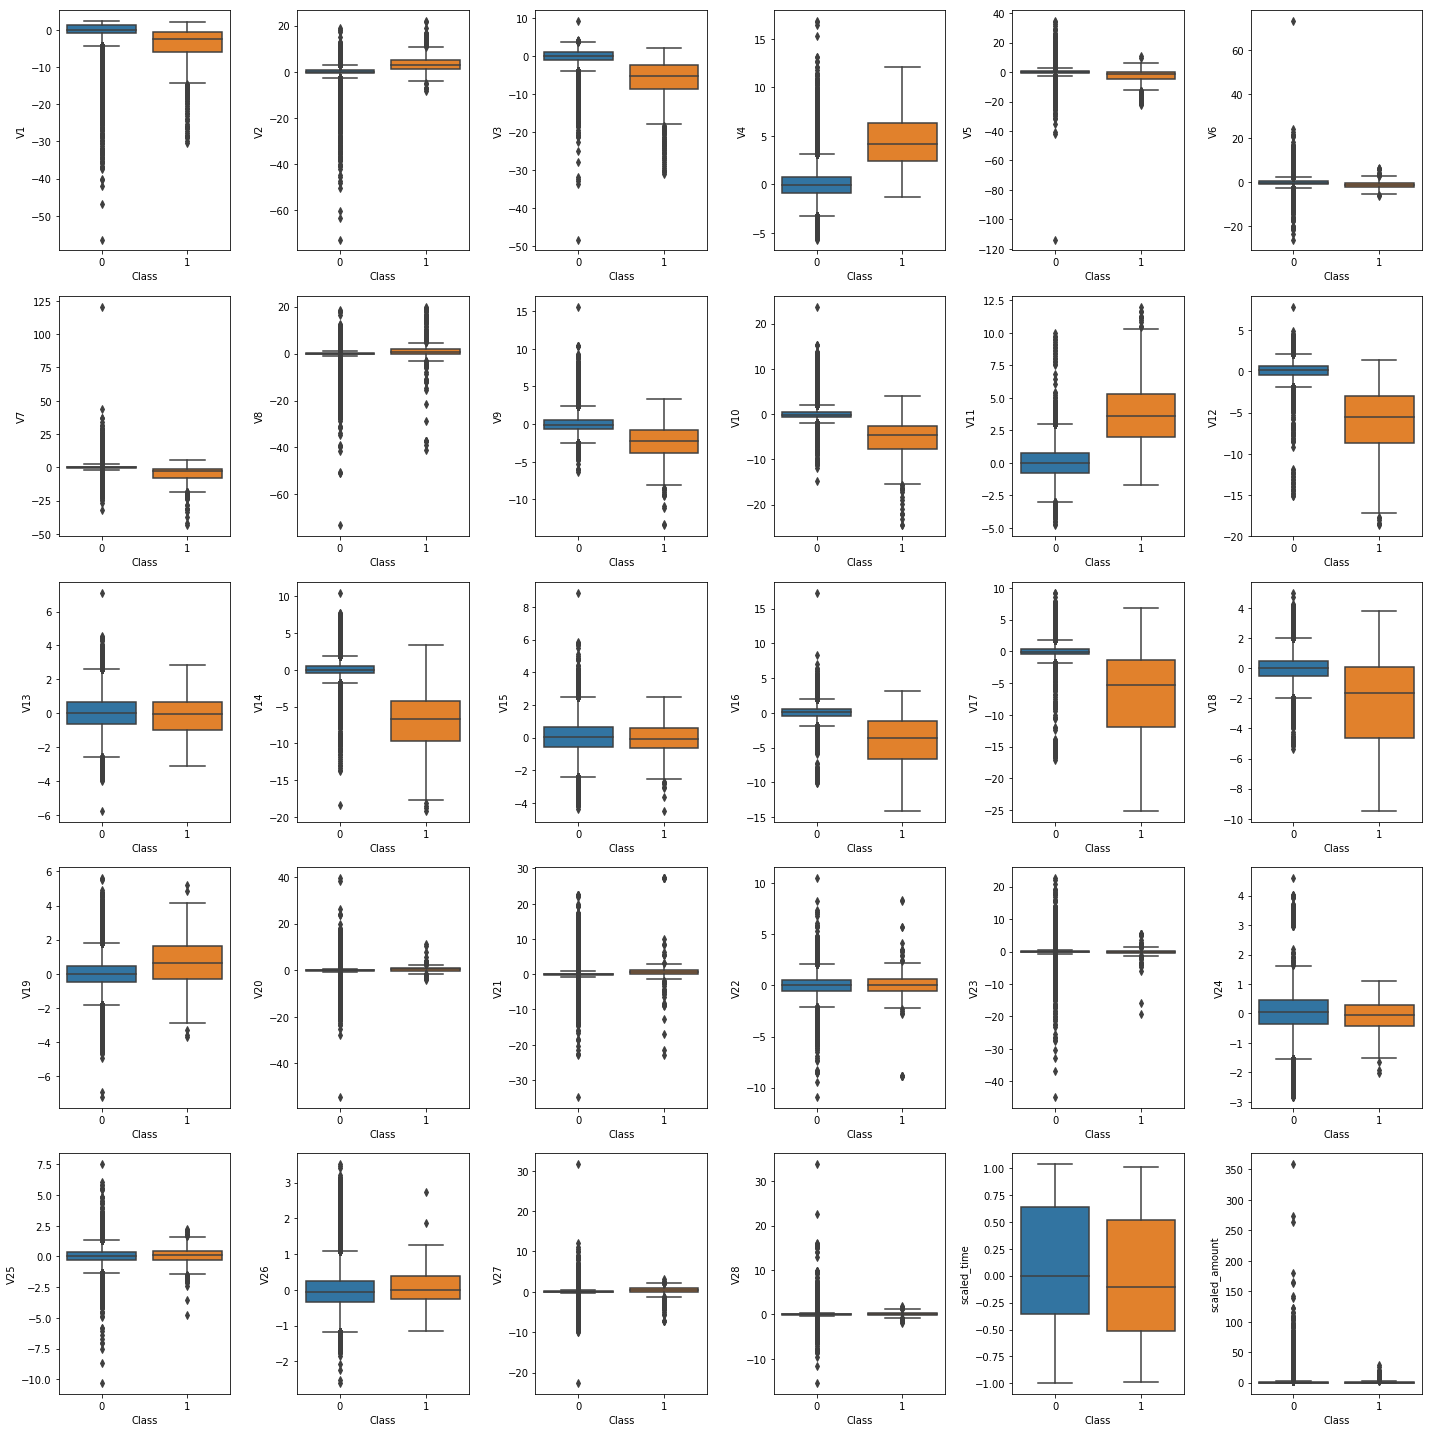

In [15]:
fig, axs = plt.subplots(5,6, figsize=(20,20))
axs = axs.flatten() #flatten() converts the 2d array to 1d

for i, col in enumerate(df.select_dtypes(exclude=['category'])):
    sns.boxplot(x='Class', y=col, data=df, ax=axs[i])
    plt.tight_layout()

**3.5 Bivariate - Continuous vs continuous (Correlation heatmap)**

- Most vars are fairly uncorrelated with all others (understandbly as they seem to the PCS components from raw predictors which are not shared in available data) except two, namely 'scaled time' and 'scaled amount' which have decent correlations with all others but still not huge (less than |0.5|)

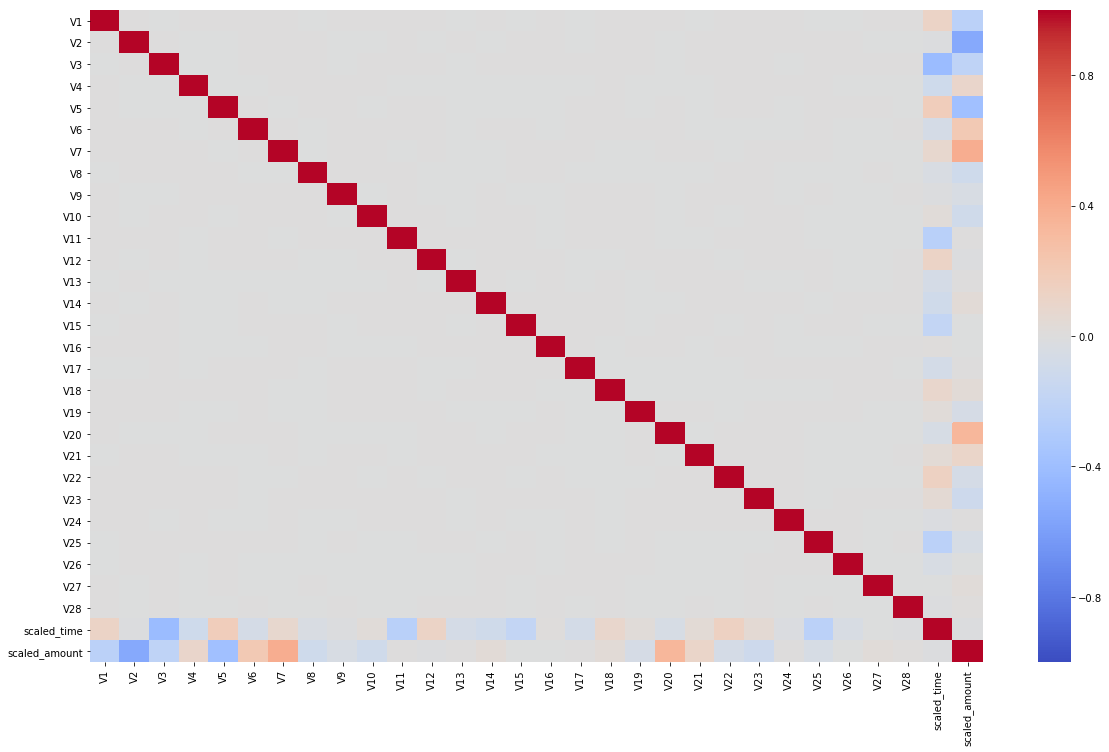

In [16]:
#CORR-HMAP
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(df.corr(), ax=ax, vmin=-1, vmax=1, center=0, cmap='coolwarm')

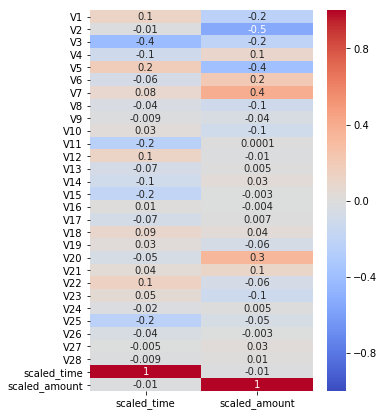

In [17]:
#CORR-HMAP for 'scaled time' and 'scaled amount'
fig, ax =plt.subplots(figsize=(5, 7))
sns.heatmap(df.corr()[['scaled_time', 'scaled_amount']], ax=ax, annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap='coolwarm')

**3.6 Bivariate - Categorical vs categorical (Contingency plots)**
- We have just one categorical variable, so this plot is not applicable here

**3.7 Visualising structure of data using t-SNE | Takes a lot of time to run** 
- If we get well-separated groups for given or identified set of variables, we could also explore Supervised Learning classifiers for this data, as they would possibly be able to perform well as well!
- Seems like the classifiers would do a terrible job at identifying the frauds, frauds seems to be all over the place for given the structure of data 

df_1=df.sample(n=100000)

tsne = TSNE(n_components=2, perplexity=5, n_iter=250, verbose=1)
tsne_results = tsne.fit_transform(df_1.drop('Class', axis=1))
df_2d=pd.DataFrame(df_1["Class"].values.tolist(), columns=["Class"])
df_2d["tsne-2d-one"]=tsne_results[:,0]
df_2d["tsne-2d-two"]=tsne_results[:,1]

plt.figure(figsize=(20,12))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Class",
    palette=sns.color_palette("hls", 2),
    data=df_2d,
    legend="full",
    alpha=0.8
)

### 4. Data Preparation

**4.1 Segregating data based on target and predictors variables**

In [57]:
#Creating the target and predictor list
target = "Class"
predictors = [col for col in list(df.columns) if col not in target]

#Creating predictor and target dataframes
X = df[predictors]
y = df[target]

### 5. Model Building

**5.1 Building baseline or default models**

In [66]:
# Creating a dictionary of classifers
classifiers = {
    "IF": IsolationForest(),
    "LOF": LocalOutlierFactor()}

In [ ]:
#Fitting model and tagging outliers
for i, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name=="LOF":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    #The algos predicts {1,-1} for {normal, anomalous} case, whereas original y has {0,1}
    y_pred[y_pred==1]=0
    y_pred[y_pred==-1]=1
    
    #Evaluation
    n_errors = sum(y_pred!=y)
    print('n_errors for {}: {}'.format(clf_name, n_errors))
    print('Accuracy is {}'.format(accuracy_score(y,y_pred)))
    print(classification_report(y,y_pred))

/Users/sparkhe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/sparkhe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/Users/sparkhe/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


IF: 28109
Accuracy is 0.9013050943270355
              precision    recall  f1-score   support

           0       1.00      0.90      0.95    284315
           1       0.02      0.88      0.03       492

   micro avg       0.90      0.90      0.90    284807
   macro avg       0.51      0.89      0.49    284807
weighted avg       1.00      0.90      0.95    284807



/Users/sparkhe/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/lof.py:236: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
